# 1.Import Library

In [1]:
#I build this on local
#pip install opencv-python

In [2]:
import cv2
import uuid #to create unique filepath
import os
import time #to wait a range of time for each capture image

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 2.Set Up Folder And Path

In [4]:
#Label things to detect, each one 5 pictures
labels = ['phone', '1_min_break', '2_min_break', '5_min_break','on_screen','off_screen','sleep']
#Choose the number of images for each label
number_imgs = 7

In [5]:
#Create an image path
IMAGES_PATH = os.path.join('Model', 'Work', 'Images', 'Collect')

In [6]:
#Check if the IMAGES_PATH existed, if not then create it
if not os.path.exists(IMAGES_PATH):
    #For Window OS
    !mkdir {IMAGES_PATH}
for label in labels:
    #Create each label folder in the IMAGES_PATH
    path = os.path.join(IMAGES_PATH, label)
    #Check if existed, if not then create it
    if not os.path.exists(path):
        !mkdir {path}

In [7]:
CUSTOM_MODEL = 'resnet_v2_50' 
PRETRAINED_MODEL_NAME = 'centernet_resnet50_v2_512x512_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [8]:
paths = {
    'WORKSPACE_PATH': os.path.join('Model', 'Work'),
    'SCRIPTS_PATH': os.path.join('Model','Scripts'),
    'APIMODEL_PATH': os.path.join('Model','APImodel'),
    'ANNOTATION_PATH': os.path.join('Model', 'Work','Annotations'),
    'IMAGE_PATH': os.path.join('Model', 'Work','Images'),
    'MODEL_PATH': os.path.join('Model', 'Work','Models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Model', 'Work','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Model', 'Work','Models',CUSTOM_MODEL), 
    'OUTPUT_PATH': os.path.join('Model', 'Work','Models',CUSTOM_MODEL, 'export'), 
    'TFJS_PATH':os.path.join('Model', 'Work','Models',CUSTOM_MODEL, 'tfjsexport'), 
    'PROTOC_PATH':os.path.join('Model','protoc')
 }

In [9]:
files = {
    'PIPELINE_CONFIG':os.path.join('Model', 'Work','Models', CUSTOM_MODEL, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [10]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}

# 3.Capture Images

In [11]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label)) #Collect for each label
    time.sleep(6) #stop 6 seconds after each label collected
    for num in range(number_imgs):
        print('Collecting image {}'.format(num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2) #stop 2 seconds after each image collected

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# 4.Label Images 

In [18]:
#Download this to use the tool
pip install --user --upgrade pyqt5 lxml

SyntaxError: invalid syntax (1871666601.py, line 2)

In [12]:
#Create a folder to clone label image tool
LABELIMG_PATH = os.path.join('Model', 'LabelTool')

In [13]:
#Clone it
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [14]:
#Run pyrcc5 to able to use the tool
!cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
#Open Label Imagee Tool
!cd {LABELIMG_PATH} && python labelImg.py

qt.qpa.fonts: Unable to open default EUDC font: "EUDC.TTE"


# 5.Move to Train and Test folder

In [14]:
import shutil #to move file

In [15]:
#Creatttee train and test folder
TRAIN_PATH = os.path.join('Model', 'Work','Images','Train')
if not os.path.exists(TRAIN_PATH):
    !mkdir {TRAIN_PATH}
TEST_PATH=os.path.join('Model', 'Work','Images','Test')
if not os.path.exists(TEST_PATH):
    !mkdir {TEST_PATH}

In [16]:
#Make a list of folder which place in the image folder 
#Each folder in it have the images and their corresponding xml file
img_folder=os.listdir(IMAGES_PATH)

In [17]:
for folder in img_folder:
    path=IMAGES_PATH+'\\'+folder
    list_img=os.listdir(path) #list of img and annotation files
    range_img=range(len(list_img))
    threshold=int(len(list_img)*0.8)
    if threshold%2==1:
        threshold+=1
    #split them, the test folder will have 20% of data
    for img in range_img:
        if img<threshold :
            path_move=path+'\\'+list_img[img]
            move=shutil.move(path_move,TRAIN_PATH)
        else:
            path_move=path+'\\'+list_img[img]
            move=shutil.move(path_move,TEST_PATH)
            

# 6.Download TF Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [18]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [19]:
import wget

In [20]:
#Clone tensorflow 
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [12]:
#Install tensorflow version 2.10.0 because it is the latest version can use wittht CUDA and CuDNN, youu should download them
pip install tensorflow==2.10.0

SyntaxError: invalid syntax (811118410.py, line 2)

In [22]:
#Load protocol buffers version 3.20.3, it should be later than version 4 
if os.name=='nt': #For window
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.20.3/protoc-3.20.3-win64.zip"
    wget.download(url)
    !move protoc-3.20.3-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.20.3-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Model/APImodel/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Model/APImodel/research/slim && pip install -e . 

 46% [..................................                                        ]  712704 / 1544720

100% [..........................................................................] 1544720 / 1544720        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

C:\Users\Minh Truc\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\Minh Truc\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\Minh Truc\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: otobuf is an invalid version and will not be supported in a future release
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
No local packages or working d

In [12]:
#Sometime the above is not enough, so you should do this too
pip install protobuf==3.20.3

Note: you may need to restart the kernel to use updated packages.


In [25]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

C:\Users\Minh Truc\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.10.9: C:\Users\Minh Truc\anaconda3\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-06-02 21:55:44.975294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fl

In [27]:
# pip install tf_slim

In [28]:
# pip install gin-config

In [29]:
# pip install tensorflow-addons==0.20.0

In [13]:
import object_detection

In [31]:
#Load pretrained model
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

KeyboardInterrupt: 

#  7.Create label map

In [11]:
labels = [{'name':'phone', 'id':1}, {'name':'1-minute break', 'id':2}, {'name':'2-minute break', 'id':3}, {'name':'5-minute break', 'id':4},
          {'name':'on screen', 'id':5},{'name':'off screen', 'id':6},{'name':'sleep', 'id':7}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

#  8.Create TF Records

In [32]:
#Clone this python file, which can help you sample tensorFlow xml file to TFRecord file for later training
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [33]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Model\Work\Annotations\train.record
Successfully created the TFRecord file: Model\Work\Annotations\test.record


# 9.Copy Model Config To Training Folder

In [27]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 10.Update Config For Transfer Learning

In [11]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [29]:
#This is the eexample config that the model give you, we will modify it
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [30]:
config

{'model': center_net {
   num_classes: 90
   feature_extractor {
     type: "resnet_v2_50"
   }
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 512
       max_dimension: 512
       pad_to_max_dimension: true
     }
   }
   object_detection_task {
     task_loss_weight: 1.0
     offset_loss_weight: 1.0
     scale_loss_weight: 0.10000000149011612
     localization_loss {
       l1_localization_loss {
       }
     }
   }
   object_center_params {
     object_center_loss_weight: 1.0
     classification_loss {
       penalty_reduced_logistic_focal_loss {
         alpha: 2.0
         beta: 4.0
       }
     }
     min_box_overlap_iou: 0.699999988079071
     max_box_predictions: 100
   }
 },
 'train_config': batch_size: 128
 data_augmentation_options {
   random_horizontal_flip {
   }
 }
 data_augmentation_options {
   random_crop_image {
     min_aspect_ratio: 0.5
     max_aspect_ratio: 1.7000000476837158
     random_coef: 0.25
   }
 }
 data_augmentation_options {


In [31]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [32]:
#modify the config
pipeline_config.model.center_net.num_classes = len(labels)
pipeline_config.train_config.batch_size = 3
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [33]:
#Write it to the file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

# 11.Train The Model

In [34]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [42]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [43]:
print(command)

python Model\APImodel\research\object_detection\model_main_tf2.py --model_dir=Model\Work\Models\resnet_v2_50 --pipeline_config_path=Model\Work\Models\resnet_v2_50\pipeline.config --num_train_steps=2000


In [44]:
# pip install pycocotools

In [46]:
!{command}

C:\Users\Minh Truc\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-06-02 07:57:01.878425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 07:57:02.313927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/de

# 12.Evaluate the model

In [35]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])



In [36]:
print(command)

python Model\APImodel\research\object_detection\model_main_tf2.py --model_dir=Model\Work\Models\resnet_v2_50 --pipeline_config_path=Model\Work\Models\resnet_v2_50\pipeline.config --checkpoint_dir=Model\Work\Models\resnet_v2_50


In [39]:
!{command}

C:\Users\Minh Truc\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0602 22:10:55.124080 28456 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0602 22:10:55.124080 28456 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0602 22:10:55.124080 28456 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0602 2

In [40]:
TSB_TRAIN_PATH= os.path.join('Model', 'Work', 'Models', 'resnet_v2_50','train')
TSB_TEST_PATH=os.path.join('Model', 'Work', 'Models', 'resnet_v2_50','eval')

In [41]:
#view in tensorboard
!cd {TSB_TRAIN_PATH} && tensorboard --logdir=.
#http://localhost:6006/#timeseries

^C


# 13.Load Train Model from Checkpoint

In [12]:
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

C:\Users\Minh Truc\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [13]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

# 14.Test from an Image

In [14]:
#create category index to draw the box
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [15]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', "sleep.9ae76cfe-fae1-11ed-9cd0-8045dd505bd5.jpg")

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

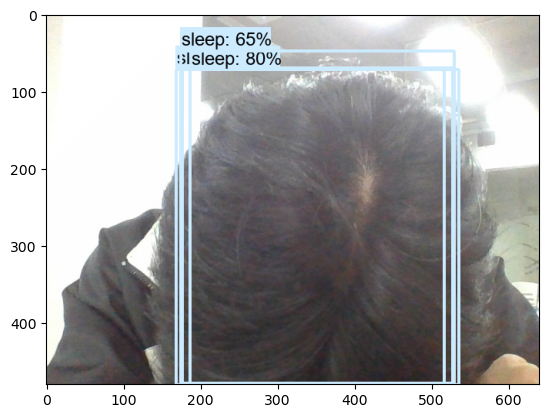

In [17]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32) #expand it to tetsor shape

image, shapes = detection_model.preprocess(input_tensor) #preprocess the input
prediction_dict = detection_model.predict(image, shapes)#predict the output
detections = detection_model.postprocess(prediction_dict, shapes)#postprocess the output

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()} #change it to the key-value structure
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=4,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 15.Real Time Testing

In [21]:
from IPython.display import Audio 
from IPython.core.display import display

C:\Users\Minh Truc\AppData\Local\Temp\ipykernel_19856\1605908316.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [23]:
def respond(label):
    def beep():
        display(Audio('sound.wav', autoplay=True))
    if label==1 or label==6 or label==7: #phone,slep,not look at screen
        beep()
        time.sleep(3) #sleep 3 second after the sound
    if label==2: #1 finger shape, then sleep 1 minute
        time.sleep(60)
    if label==3: #2 finger shape, then sleep 2 minute
        time.sleep(120)
    if label==4: #5 finger shape, then sleep 5 minute
        time.sleep(300)

In [24]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32) #expand it to tetsor shape

    image, shapes = detection_model.preprocess(input_tensor) #preprocess the input
    prediction_dict = detection_model.predict(image, shapes)#predict the output
    detections = detection_model.postprocess(prediction_dict, shapes)#postprocess the output

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()} #change it to the key-value structure
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=3,
                min_score_thresh=.85,
                agnostic_mode=False)
    
    labels=detections['detection_classes']+label_id_offset
    label_max=labels[0]
    # Call the track activities function
    respond(label_max)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 16.Freezing The Graph

In [55]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [56]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [57]:
print(command)

python Model\APImodel\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Model\Work\Models\resnet_v2_50\pipeline.config --trained_checkpoint_dir=Model\Work\Models\resnet_v2_50 --output_directory=Model\Work\Models\resnet_v2_50\export


In [58]:
!{command}

C:\Users\Minh Truc\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-06-01 13:52:48.874197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 13:52:49.335533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/de

# 17.Convert To TFJS

In [9]:
pip install tensorflowjs

  Using cached tensorflowjs-4.6.0-py3-none-any.whl (85 kB)
  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached flax-0.6.2-py3-none-any.whl (189 kB)
  Using cached jax-0.4.11.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached tensorflowjs-4.5.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.4.0-py3-none-any.whl (85 kB)
  Using cached flax-0.6.10-py3-none-any.whl (226 kB)
  Using cached tensorflowjs-4.3.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.2.0-py3-none-any.whl (84 kB)
  Using cached tensorflowjs-4.1.0-py3-none-any.whl (84 kB)
  Using cached tensorflowjs-4.0.0-

In [10]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [11]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Model\Work\Models\resnet_v2_50\export\saved_model Model\Work\Models\resnet_v2_50\tfjsexport


In [12]:
!{command}

Writing weight file Model\Work\Models\resnet_v2_50\tfjsexport\model.json...


2023-06-01 15:41:24.406392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 15:41:28.138583: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2153 MB memory:  -> device: 0, name: GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:5b:00.0, compute capability: 7.5
2023-06-01 15:42:24.431150: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-06-01 15:42:24.432403: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-06-01 15:42:24.455241: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/dev

# 18.Zip And Extract Model

In [64]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}